### Padma Vibhushan Ilayaraja is one of the greatest film composers of modern India who has composed music for more than 1000 films with 7000 or more songs. He was born in a sched- uled caste in a remote village in Tamilnadu (bordering Kerala), and despite having many troubles, dedicated his life to learning music with love and passion. His music composition consisted of playing Indian classical ragas on Western instruments, and he composed many masterpieces. One of such finest pieces is the ‘3-note’ supplied with this examination (Ila- yaraja3in1.mp3). Usually, to make a masterpiece, one needs the support of as many notes as possible (like Sapta swaras), but our maestro made a beautiful ‘3-note’. Being a science and technology lover, can you find the frequencies and their range involved by plotting a power spectral density and spectrogram via the wavelet transforms of your choice? Can you remove one of the notes (and nearby range) and reconstruct a 2-note clip? How does it sound?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Midsem_2023/')

from pydub import AudioSegment

# Read the MP3 file into an AudioSegment object

audio = AudioSegment.from_file('Ilayaraja_3in1.mp3')
audio = audio.set_channels(1) ## we need monoaudio
# Convert the audio data to a NumPy array
audio_array = np.array(audio.get_array_of_samples())

# Check the shape of the array (it will be a 1D array for mono audio)
print(audio_array.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1279872,)


In [ ]:
sampling_rate = audio.frame_rate
print(sampling_rate)

44100


In [ ]:
import pywt

In [ ]:
n = 3
w = 'db1'
coeffs = pywt.wavedec(audio_array,wavelet=w,level=n)

In [ ]:
coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

In [ ]:
print(coeff_slices)

[(slice(None, 159984, None),), {'d': (slice(159984, 319968, None),)}, {'d': (slice(319968, 639936, None),)}, {'d': (slice(639936, 1279872, None),)}]


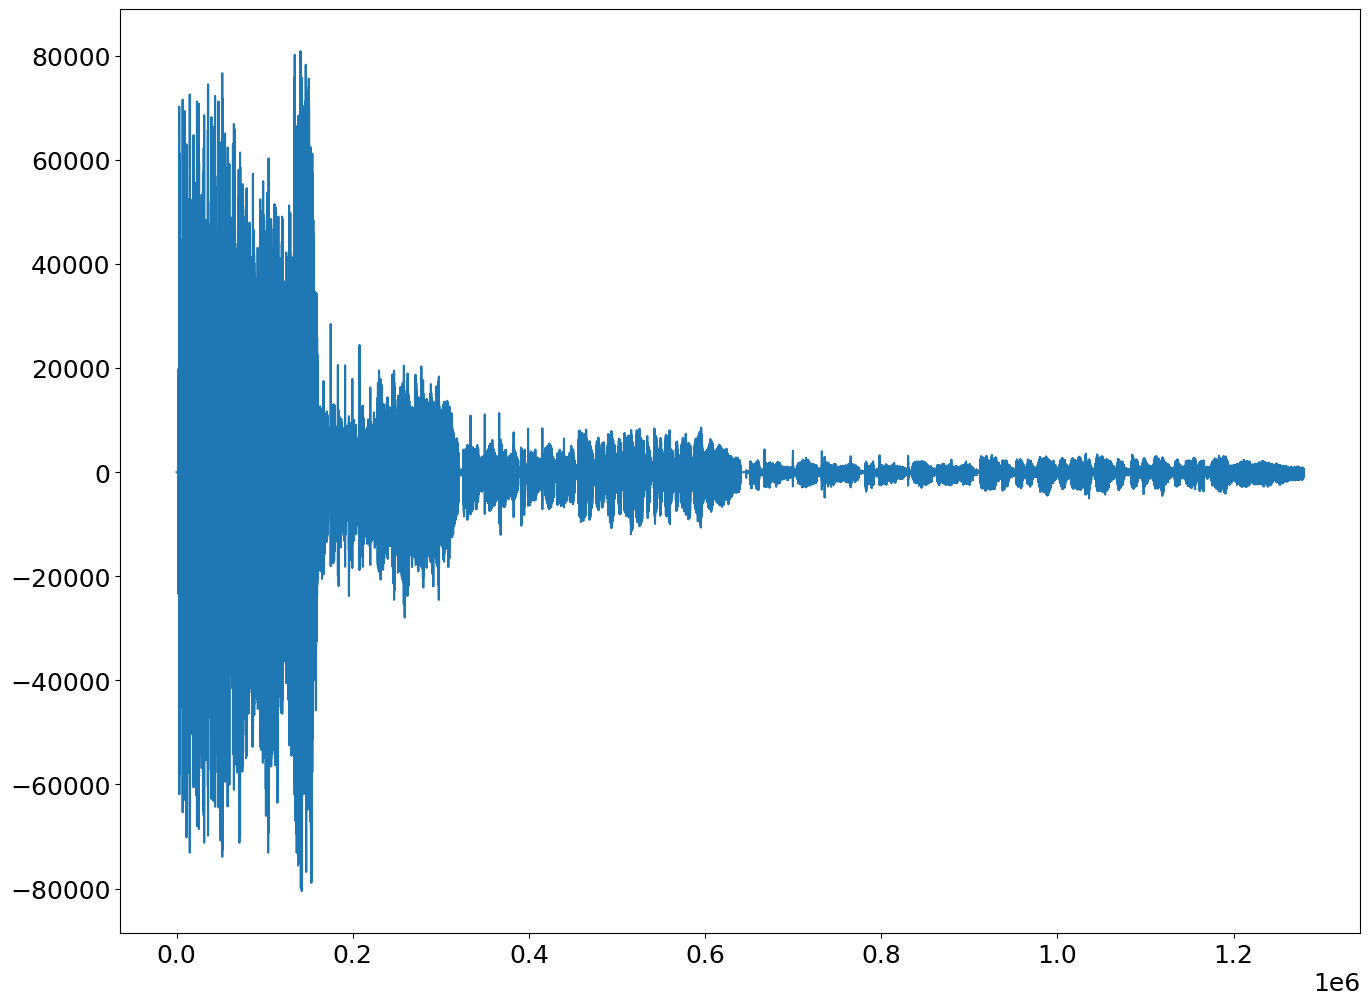

In [ ]:
plt.plot(coeff_arr)
plt.show()

In [ ]:
coeff_arr[0:159984] = 0

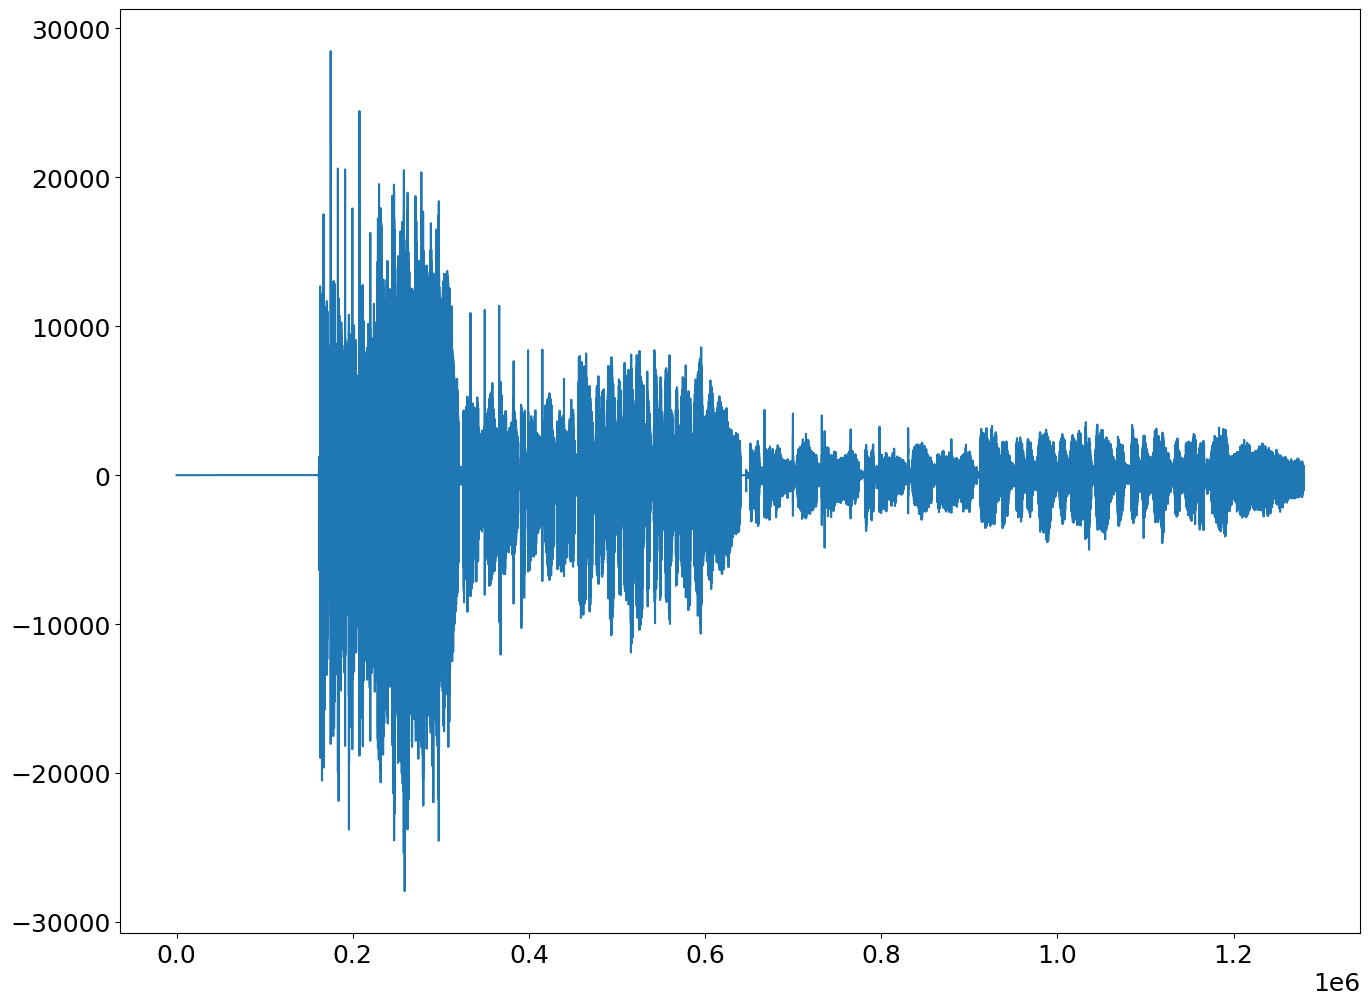

In [ ]:
plt.plot(coeff_arr)
plt.show()

In [ ]:
coeffs_filt = pywt.array_to_coeffs(coeff_arr,coeff_slices,output_format='wavedec')

In [ ]:
Arecon = pywt.waverec(coeffs_filt,wavelet=w)

In [ ]:
np.shape(Arecon)

(1279872,)

In [ ]:
from IPython.display import Audio
audio = Audio(Arecon, rate= 44100)
display(audio)

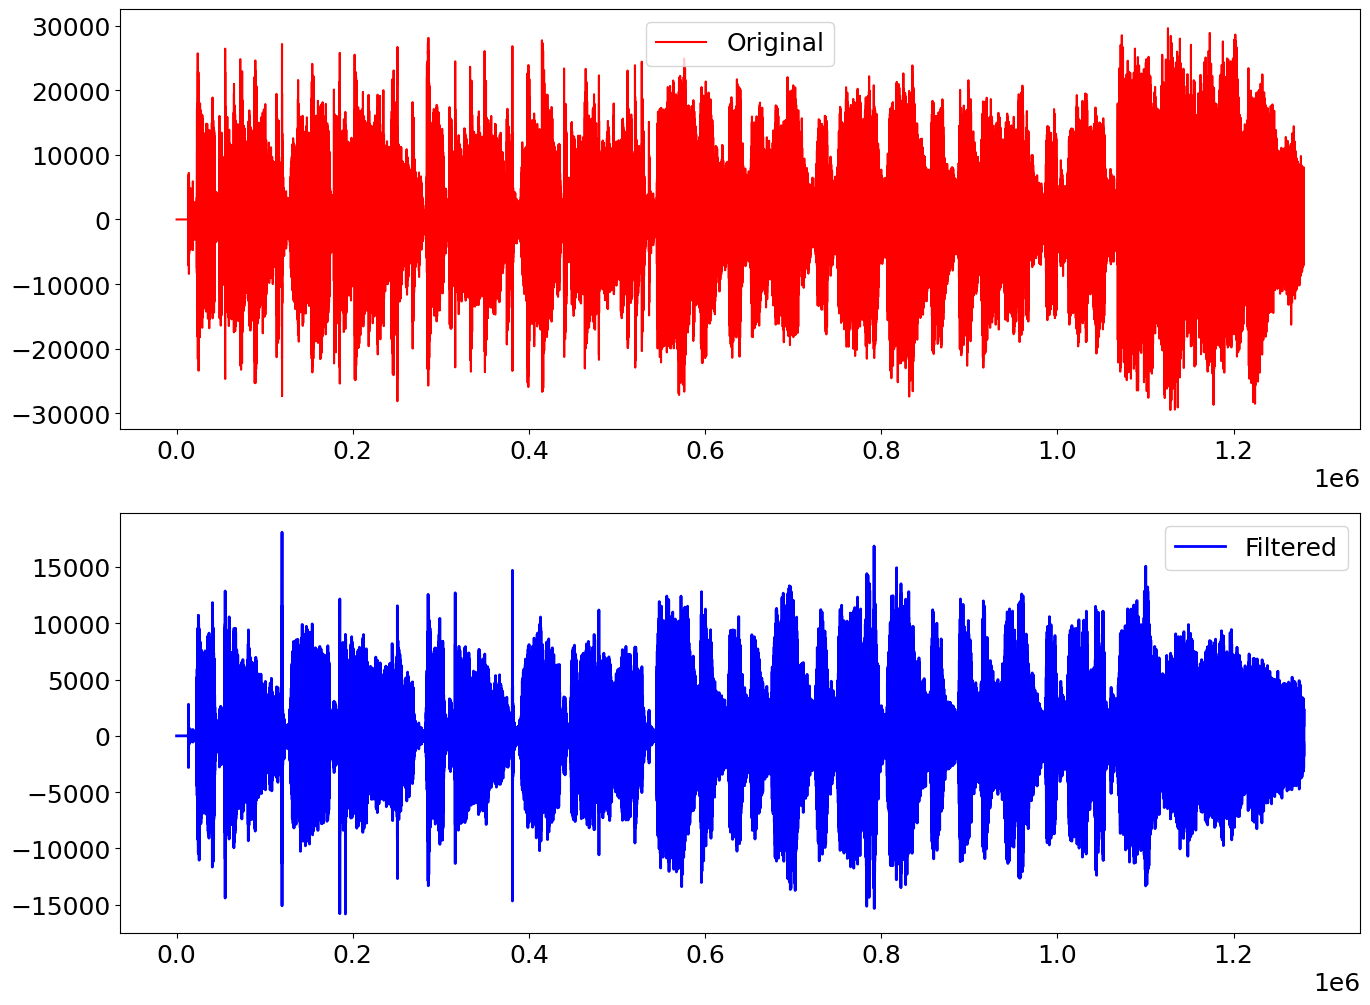

In [ ]:
fig,axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(audio_array,color='r',linewidth=1.5,label='Original')
plt.legend()
plt.sca(axs[1])
plt.plot(Arecon,color='b',linewidth=2,label='Filtered')
plt.legend()